### Rat-race + NR phase shifter

In [1]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from Electromagnetics import Misc
from IPython.display import display, Math, Latex


phi_p = Symbol('\\phi_+', real=True)
phi_m = Symbol('\\phi_-', real=True)
g_p = Symbol('G_+', real=True)
g_m = Symbol('G_-', real=True)


Snet = EmNetwork()

S_ratrace = -I/sqrt(2)*Matrix([[ 0, 1, 0,-1],
                               [ 1, 0, 1, 0],
                               [ 0, 1, 0, 1],
                               [-1, 0, 1, 0]])



S_phaser = Matrix([[0, g_m*exp(-I*phi_m)],
                   [g_p*exp(-I*phi_p), 0]])


Snet.addComponent(S_ratrace, "ratrace", 1)
Snet.addComponent(S_phaser, "phaser", 1)

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))
#print latex(S)


Snet.addConnection("ratrace", 1, "phaser", 0)
Snet.addConnection("ratrace", 3, "phaser", 1)


S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))

Isolation = abs(S[1,0]/S[0,1]).simplify()
display(Math('\\text{Isolation} = ' + latex(Isolation)))

print(latex(S))

S = S.subs([(g_p, 1), (g_m, 1)])
display(Math('S = ' + latex(S)))

Isolation = abs(S[1,0]/S[0,1]).simplify()
display(Math('\\text{Isolation} = ' + latex(Isolation)))


SST = S.T*conjugate(S)
SST = Misc.SymMatrixSimplify(SST)
display(Math('SST = ' + latex(SST)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}\frac{G_{+}}{2} e^{- i \phi_+} + \frac{G_{-}}{2} e^{- i \phi_-} & \frac{G_{+}}{2} e^{- i \phi_+} - \frac{G_{-}}{2} e^{- i \phi_-}\\- \frac{G_{+}}{2} e^{- i \phi_+} + \frac{G_{-}}{2} e^{- i \phi_-} & - \frac{G_{+}}{2} e^{- i \phi_+} - \frac{G_{-}}{2} e^{- i \phi_-}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from Electromagnetics import Misc
from IPython.display import display, Math, Latex

a, b, c, d = symbols('a, b, c, d')

Snet = EmNetwork()

S_ratrace = -I/sqrt(2)*Matrix([[ 0, 1, 0,-1],
                               [ 1, 0, 1, 0],
                               [ 0, 1, 0, 1],
                               [-1, 0, 1, 0]])



S_phaser = Matrix([[a, b],
                   [c, d]])


Snet.addComponent(S_ratrace, "ratrace", 1)
Snet.addComponent(S_phaser, "phaser", 1)

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))
#print latex(S)


Snet.addConnection("ratrace", 1, "phaser", 0)
Snet.addConnection("ratrace", 3, "phaser", 1)


S = Snet.getTotalScatteringMatrix()
S = Misc.SymMatrixSimplify(S)
display(Math('S = ' + latex(S)))

print(latex(S))

print('absorbing isolator')
abcd_sub = solve([S[0,0], S[1,0]-1, S[0,1], S[1,1]], [a, b, c, d])
display(Math('abcd = ' + latex(abcd_sub)))

a_sub = abcd_sub[a]
b_sub = abcd_sub[b]
c_sub = abcd_sub[c]
d_sub = abcd_sub[d]

S_phaser_sub = S_phaser.subs([(a, a_sub), (b, b_sub), (c, c_sub), (d, d_sub)])
display(Math('S_\\text{phaser} = ' + latex(S_phaser_sub)))

S_sub = S.subs([(a, a_sub), (b, b_sub), (c, c_sub), (d, d_sub)])
display(Math('S = ' + latex(S_sub)))

print('reflecting isolator')
abcd_sub = solve([S[0,0], S[1,0]-1, S[0,1], S[1,1]+1], [a, b, c, d])
display(Math('abcd = ' + latex(abcd_sub)))


a_sub = abcd_sub[a]
b_sub = abcd_sub[b]
c_sub = abcd_sub[c]
d_sub = abcd_sub[d]

S_phaser_sub = S_phaser.subs([(a, a_sub), (b, b_sub), (c, c_sub), (d, d_sub)])
display(Math('S_\\text{phaser} = ' + latex(S_phaser_sub)))

S_sub = S.subs([(a, a_sub), (b, b_sub), (c, c_sub), (d, d_sub)])
display(Math('S = ' + latex(S_sub)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}- \frac{a}{2} + \frac{b}{2} + \frac{c}{2} - \frac{d}{2} & - \frac{a}{2} - \frac{b}{2} + \frac{c}{2} + \frac{d}{2}\\- \frac{a}{2} + \frac{b}{2} - \frac{c}{2} + \frac{d}{2} & - \frac{a}{2} - \frac{b}{2} - \frac{c}{2} - \frac{d}{2}\end{matrix}\right]
absorbing isolator


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

reflecting isolator


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Populating the interactive namespace from numpy and matplotlib
 ratrace S = 
 [[ 0.+0.j     0.-0.707j  0.+0.j    -0.+0.707j]
 [ 0.-0.707j  0.-0.j     0.-0.707j  0.+0.j   ]
 [-0.+0.j     0.-0.707j  0.-0.j     0.-0.707j]
 [-0.+0.707j  0.+0.j     0.-0.707j  0.+0.j   ]]


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma', 'add', 'eye', 'vectorize', 'reshape', 'pi', 'Circle', 'sinc', 'cbrt', 'power', 'det', 'sqrt', 'trace', 'exp', 'invert', 'var', 'sign', 'sin', 'log', 'plot', 'binomial', 'flatten', 'multinomial', 'mod', 'conjugate', 'cosh', 'ones', 'poly', 'transpose', 'roots', 'source', 'nan', 'plotting', 'prod', 'diff', 'beta', 'zeros', 'tan', 'tanh', 'seterr', 'interactive', 'sinh', 'floor', 'solve', 'trunc', 'take', 'diag', 'test', 'cos', 'product', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


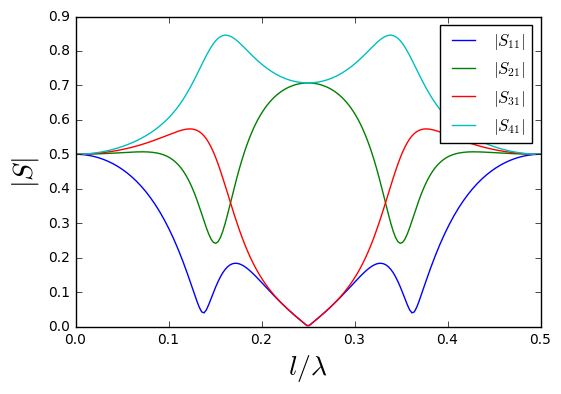

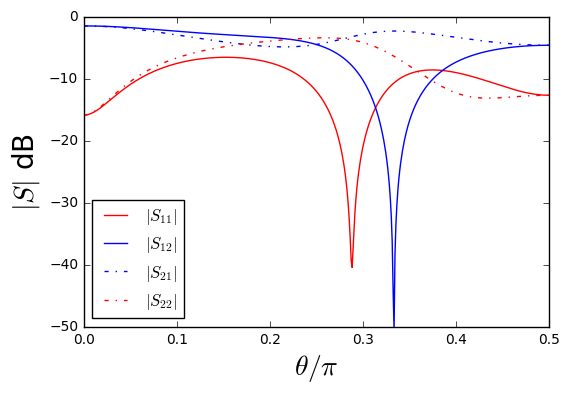

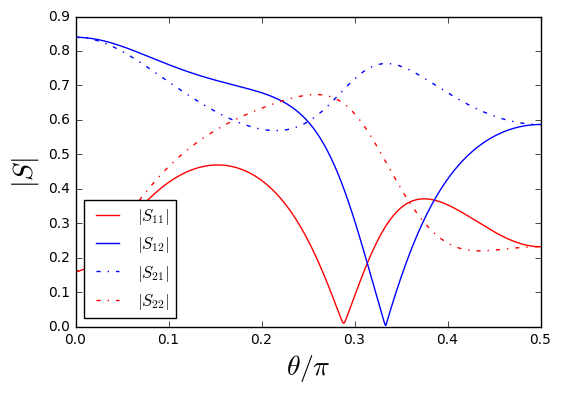

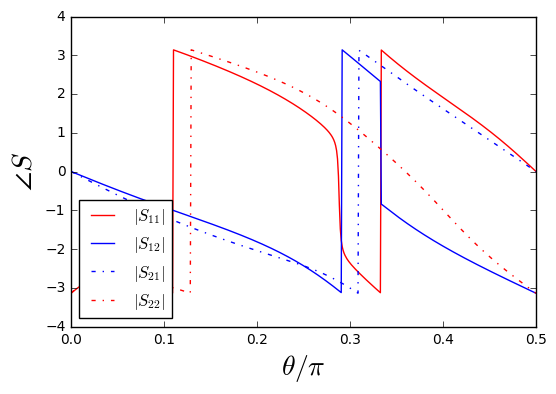

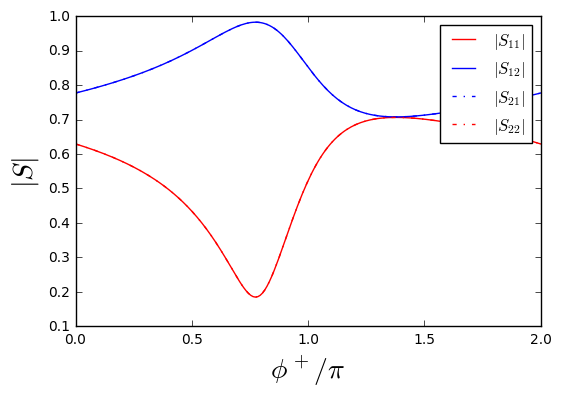

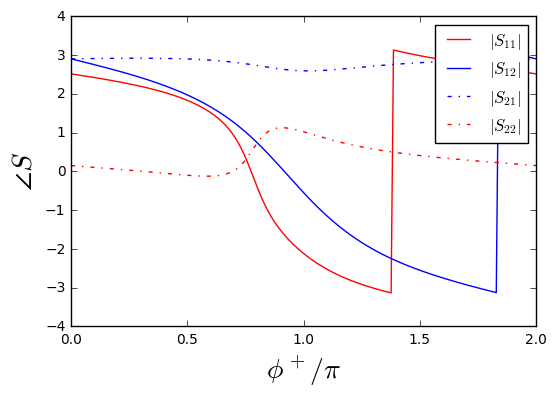

In [27]:
%pylab inline
import numpy as np
from Electromagnetics.NetworkAnalysis import *
from Electromagnetics import Misc

np.set_printoptions(suppress=True, precision=3)


def GetS_ScaledRatRace(theta, zT_zc):
    Snet = EmNetwork()

    S_branch_short = np.array([[0, np.exp(-1j*theta)],
                               [np.exp(-1j*theta), 0]])
    S_branch_long = np.array([[0, np.exp(-1j*3*theta)],
                              [np.exp(-1j*3*theta), 0]])

    Z0 = 1.0
    S_T = TL_Tjunc_Smat(Z0, zT_zc*Z0)

    #print('S_junc = ', S_T)


    Snet.addComponent(S_T, "junc", 4)
    Snet.addComponent(S_branch_short, "br_short", 3)
    Snet.addComponent(S_branch_long, "br_long", 1)

    #S = Snet.getTotalScatteringMatrix()
    #print('S = ', S)


    Snet.addConnection("junc_0", 1, "br_short_0", 0)
    Snet.addConnection("junc_0", 2, "br_long", 0)
    Snet.addConnection("junc_1", 1, "br_short_0", 1)
    Snet.addConnection("junc_1", 2, "br_short_1", 0)
    Snet.addConnection("junc_2", 1, "br_short_1", 1)
    Snet.addConnection("junc_2", 2, "br_short_2", 0)
    Snet.addConnection("junc_3", 1, "br_short_2", 1)
    Snet.addConnection("junc_3", 2, "br_long", 1)

    S = Snet.getTotalScatteringMatrix()
    return S


def GetS_RatRaceIsolator(theta, zt_zc, phi_p, phi_m, g_p=1.0, g_m=1.0):
    Snet = EmNetwork()

    S_ratrace = GetS_ScaledRatRace(theta, zt_zc)
    
    S_phaser = np.array([[0, g_m*exp(-1j*phi_m)],
                         [g_p*exp(-1j*phi_p), 0]])


    Snet.addComponent(S_ratrace, "ratrace", 1)
    Snet.addComponent(S_phaser, "phaser", 1)

    Snet.addConnection("ratrace", 1, "phaser", 0)
    Snet.addConnection("ratrace", 3, "phaser", 1)

    S = Snet.getTotalScatteringMatrix()
    return S


print(' ratrace S = \n', GetS_ScaledRatRace(np.pi/2.0, np.sqrt(2)))


N = 200
theta_arr = np.linspace(0.0, np.pi, N)

Srr_00 = np.zeros(N, dtype=complex)
Srr_10 = np.zeros(N, dtype=complex)
Srr_20 = np.zeros(N, dtype=complex)
Srr_30 = np.zeros(N, dtype=complex)

for i in range(N):
    theta = theta_arr[i]
    zt_zc = np.sqrt(2.0)

    S = GetS_ScaledRatRace(theta, zt_zc)
    Srr_00[i] = S[0,0]
    Srr_10[i] = S[1,0]
    Srr_20[i] = S[2,0]
    Srr_30[i] = S[3,0]

plot(theta_arr/np.pi/2, np.abs(Srr_00), label=r'$|S_{11}|$')
plot(theta_arr/np.pi/2, np.abs(Srr_10), label=r'$|S_{21}|$')
plot(theta_arr/np.pi/2, np.abs(Srr_20), label=r'$|S_{31}|$')
plot(theta_arr/np.pi/2, np.abs(Srr_30), label=r'$|S_{41}|$')
xlabel(r'$l/\lambda$', fontsize=20)
ylabel(r'$|S|$', fontsize=20)
legend()
show()


N = 500
theta_arr = np.linspace(0.0, np.pi/2, N)

Siso_00 = np.zeros(N, dtype=complex)
Siso_10 = np.zeros(N, dtype=complex)
Siso_01 = np.zeros(N, dtype=complex)
Siso_11 = np.zeros(N, dtype=complex)

for i in range(N):
    theta = theta_arr[i]
    zt_zc = np.sqrt(2.0)
    phi_p = np.pi
    phi_m = 0.0
    
    S = GetS_RatRaceIsolator(theta, zt_zc, phi_p, phi_m, g_p=0.3548, g_m=0.8181)
    Siso_00[i] = S[0,0]
    Siso_10[i] = S[1,0]
    Siso_01[i] = S[0,1]
    Siso_11[i] = S[1,1]

plot(theta_arr/np.pi, 20.0*np.log10(np.abs(Siso_00)), 'r', label=r'$|S_{11}|$')
plot(theta_arr/np.pi, 20.0*np.log10(np.abs(Siso_01)), 'b', label=r'$|S_{12}|$')
plot(theta_arr/np.pi, 20.0*np.log10(np.abs(Siso_10)), 'b-.', label=r'$|S_{21}|$')
plot(theta_arr/np.pi, 20.0*np.log10(np.abs(Siso_11)), 'r-.', label=r'$|S_{22}|$')
xlabel(r'$\theta/\pi$', fontsize=20)
ylabel(r'$|S|$ dB', fontsize=20)
ylim([-50, 0])
legend(loc='lower left')
show()

plot(theta_arr/np.pi, np.abs(Siso_00), 'r', label=r'$|S_{11}|$')
plot(theta_arr/np.pi, np.abs(Siso_01), 'b', label=r'$|S_{12}|$')
plot(theta_arr/np.pi, np.abs(Siso_10), 'b-.', label=r'$|S_{21}|$')
plot(theta_arr/np.pi, np.abs(Siso_11), 'r-.', label=r'$|S_{22}|$')
xlabel(r'$\theta/\pi$', fontsize=20)
ylabel(r'$|S|$', fontsize=20)
legend(loc='lower left')
show()

plot(theta_arr/np.pi, np.angle(Siso_00), 'r', label=r'$|S_{11}|$')
plot(theta_arr/np.pi, np.angle(Siso_01), 'b', label=r'$|S_{12}|$')
plot(theta_arr/np.pi, np.angle(Siso_10), 'b-.', label=r'$|S_{21}|$')
plot(theta_arr/np.pi, np.angle(Siso_11), 'r-.', label=r'$|S_{22}|$')
xlabel(r'$\theta/\pi$', fontsize=20)
ylabel(r'$\angle S$', fontsize=20)
legend(loc='lower left')
show()



N = 200
phi_p_arr = np.linspace(0.0, 2.0*np.pi, N)

Siso_00 = np.zeros(N, dtype=complex)
Siso_10 = np.zeros(N, dtype=complex)
Siso_01 = np.zeros(N, dtype=complex)
Siso_11 = np.zeros(N, dtype=complex)

for i in range(N):
    theta = np.pi/3
    zt_zc = np.sqrt(2.0)
    phi_p = phi_p_arr[i]
    phi_m = 0.0*np.pi/4.0
    
    S = GetS_RatRaceIsolator(theta, zt_zc, phi_p, phi_m, g_p=1.0, g_m=1.0)
    Siso_00[i] = S[0,0]
    Siso_10[i] = S[1,0]
    Siso_01[i] = S[0,1]
    Siso_11[i] = S[1,1]

plot(phi_p_arr/np.pi, np.abs(Siso_00), 'r', label=r'$|S_{11}|$')
plot(phi_p_arr/np.pi, np.abs(Siso_01), 'b', label=r'$|S_{12}|$')
plot(phi_p_arr/np.pi, np.abs(Siso_10), 'b-.', label=r'$|S_{21}|$')
plot(phi_p_arr/np.pi, np.abs(Siso_11), 'r-.', label=r'$|S_{22}|$')
xlabel(r'$\phi^+/\pi$', fontsize=20)
ylabel(r'$|S|$', fontsize=20)
legend()
show()

plot(phi_p_arr/np.pi, np.angle(Siso_00), 'r', label=r'$|S_{11}|$')
plot(phi_p_arr/np.pi, np.angle(Siso_01), 'b', label=r'$|S_{12}|$')
plot(phi_p_arr/np.pi, np.angle(Siso_10), 'b-.', label=r'$|S_{21}|$')
plot(phi_p_arr/np.pi, np.angle(Siso_11), 'r-.', label=r'$|S_{22}|$')
xlabel(r'$\phi^+/\pi$', fontsize=20)
ylabel(r'$\angle S$', fontsize=20)
legend()
show()




In [26]:

def f_iso(x_arg):
    theta = x_arg[0]
    g_p = x_arg[1]
    g_m = x_arg[2]
    
    theta = np.pi/3
    zt_zc = np.sqrt(2.0)
    phi_p = np.pi
    phi_m = 0.0*np.pi/4.0
    
    S = GetS_RatRaceIsolator(theta, zt_zc, phi_p, phi_m, g_p, g_m)
    iso = 20.0*np.log10(np.abs(S[1,0]/S[0,1]))
    return iso

from Electromagnetics.Misc import *
from Electromagnetics.EvolAlgs import *

tic()

res = geneticAlg(f_iso, intervals=[(0.0, np.pi), (0.0, 1.0), (0.0, 1.0)], n_bits=[10, 10, 10], pop_size=200, n_gen=300,
                 pr_cross=0.2, pr_mut=0.5, pr_bit_mut=0.1, maximize=True)
print('res: \n', res)

print("Processing time:", toc())



time_start:  33552.971864213
Start of evolution
-- End of (successful) evolution --
Best individual is [1.5016997141792854, 0.3548387096774194, 0.8181818181818182], (315.72474873060696,)
res: 
 [[1.5016997141792854, 0.3548387096774194, 0.8181818181818182], 315.72474873060696]
time_end:  33728.361232267
Processing time: 0:02:55


In [19]:

def f_iso(x_arg):
    theta = x_arg[0]
    phi_p = x_arg[1]
    phi_m = x_arg[2]

    g_p = 0.5
    g_m = 1.0
    
    zt_zc = np.sqrt(2.0)
    
    S = GetS_RatRaceIsolator(theta, zt_zc, phi_p, phi_m, g_p, g_m)
    iso = 20.0*np.log10(np.abs(S[1,0]/S[0,1]))
    return iso

from Electromagnetics.Misc import *
from Electromagnetics.EvolAlgs import *

tic()

res = geneticAlg(f_iso, intervals=[(0.0, np.pi), (0.0, 2.0*np.pi), (0.0, 2.0*np.pi)], n_bits=[10, 10, 10], pop_size=200, n_gen=300,
                 pr_cross=0.2, pr_mut=0.5, pr_bit_mut=0.1, maximize=True)
print('res: \n', res)

print("Processing time:", toc())



time_start:  45414.496240591
Start of evolution
-- End of (successful) evolution --
Best individual is [2.149672392485684, 2.941980217144694, 0.21496723924856842], (53.076964433822489,)
res: 
 [[2.149672392485684, 2.941980217144694, 0.21496723924856842], 53.076964433822489]
time_end:  45626.643566238
Processing time: 0:03:32
